# Cluster Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

In [20]:
base_dir = "../trained_models/BagOfTricks/1000val/full/"
def load_data(train, test, fname) :
#     fpath = base_dir + "{}/val/1000/best/{}/{}.txt".format(train, test, fname)
    fpath = base_dir + "{}/eval/best/{}/{}.txt".format(train, test, fname)
    return np.loadtxt(fpath).astype(np.int)

train = "autoattack"
test = "pgd"

y_original = load_data(train, test, "Y_original")
y_original_pred = load_data(train, test, "Y_original_pred")
y_adv = load_data(train, test, "Y_adv")
y_adv_pred = load_data(train, test, "Y_adv_pred")

In [21]:
def get_robust_data(train, test):
    y_adv = load_data(train, test, "Y_adv")
    y_adv_pred = load_data(train, test, "Y_adv_pred")
    return y_adv, y_adv_pred

train = "pgd"
test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(pgd,autoattack): [3 8 8 ... 5 1 7]
Y_adv_pred(pgd,autoattack): [3 8 8 ... 5 1 7]


In [22]:
train = "fgsm"
test = "autopgd"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(fgsm,autopgd): [3 8 8 ... 5 1 7]
Y_adv_pred(fgsm,autopgd): [3 8 8 ... 5 0 7]


In [23]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

attack_to_id = {}
id_to_attack = {}
for i in range(len(attacks)) :
    attack_to_id[attacks[i]] = i
    id_to_attack[i] = attacks[i]

In [24]:
predictions = {}
labels = {}

for a1 in attacks :
    p = np.array([])
    l = np.array([])
    for a2 in attacks :
        y, y_pred = get_robust_data(a1, a2)
        p = np.concatenate((p, y_pred))
        l = np.concatenate((l, y))
    predictions[a1] = p
    labels[a1] = l

In [25]:
predictions

{'autoattack': array([3., 8., 8., ..., 6., 1., 7.]),
 'autopgd': array([3., 8., 9., ..., 5., 0., 7.]),
 'bim': array([3., 8., 9., ..., 3., 0., 7.]),
 'cw': array([3., 8., 8., ..., 3., 3., 9.]),
 'fgsm': array([3., 8., 8., ..., 3., 1., 7.]),
 'pgd': array([3., 8., 8., ..., 5., 1., 7.]),
 'deepfool': array([3., 1., 9., ..., 5., 1., 5.]),
 'newtonfool': array([3., 8., 1., ..., 8., 1., 2.]),
 'squareattack': array([3., 8., 1., ..., 6., 1., 6.]),
 'pixelattack': array([8., 8., 8., ..., 8., 8., 8.]),
 'spatialtransformation': array([3., 8., 0., ..., 5., 1., 7.])}

In [26]:
labels

{'autoattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'autopgd': array([3., 8., 8., ..., 5., 1., 7.]),
 'bim': array([3., 8., 8., ..., 5., 1., 7.]),
 'cw': array([3., 8., 8., ..., 5., 1., 7.]),
 'fgsm': array([3., 8., 8., ..., 5., 1., 7.]),
 'pgd': array([3., 8., 8., ..., 5., 1., 7.]),
 'deepfool': array([3., 8., 8., ..., 5., 1., 7.]),
 'newtonfool': array([3., 8., 8., ..., 5., 1., 7.]),
 'squareattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'pixelattack': array([3., 8., 8., ..., 5., 1., 7.]),
 'spatialtransformation': array([3., 8., 8., ..., 5., 1., 7.])}

In [27]:
# compare the labels with the predictions

accuracies = []
for a in attacks :
    accuracies.append(np.equal(predictions[a], labels[a]))
accuracies

[array([ True,  True,  True, ..., False,  True,  True]),
 array([ True,  True, False, ...,  True, False,  True]),
 array([ True,  True, False, ..., False, False,  True]),
 array([ True,  True,  True, ..., False, False, False]),
 array([ True,  True,  True, ..., False,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True, False, False, ...,  True,  True, False]),
 array([ True,  True, False, ..., False,  True, False]),
 array([ True,  True, False, ..., False,  True, False]),
 array([False,  True,  True, ..., False, False, False]),
 array([ True,  True, False, ...,  True,  True,  True])]

In [28]:
accs = []
for a in attacks :
    tr = (labels[a] == predictions[a]).sum().item()
    accs.append(tr / len(labels[a]))
    
accs = pd.DataFrame(data={"attack": attacks, "accuracy": accs})
accs

,attack,accuracy
0,autoattack,0.621818
1,autopgd,0.632400
2,bim,0.620645
3,cw,0.621636
4,fgsm,0.611645
5,pgd,0.615991
6,deepfool,0.626436
7,newtonfool,0.620200
8,squareattack,0.582791
9,pixelattack,0.149455


In [29]:
sorted_acc = accs.sort_values(by="accuracy", ascending=False).reset_index(drop=True)
sorted_acc

,attack,accuracy
0,autopgd,0.632400
1,deepfool,0.626436
2,autoattack,0.621818
3,cw,0.621636
4,bim,0.620645
5,newtonfool,0.620200
6,pgd,0.615991
7,fgsm,0.611645
8,squareattack,0.582791
9,spatialtransformation,0.449636


### Dimensionality Reduction using PCA
source: https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [31]:
from sklearn.decomposition import PCA

n_components = 2
columns = ["PC" + str(i+1) for i in range(n_components)]
pca = PCA(n_components=n_components)
pca_scale = pca.fit_transform(accuracies)
pca_df_scale = pd.DataFrame(pca_scale, columns=columns)
print(pca.explained_variance_ratio_)

[0.3122146  0.13327788]


N cluster :  2
Silhouette Coefficient: 0.741
N cluster :  3
Silhouette Coefficient: 0.778
N cluster :  4
Silhouette Coefficient: 0.305
N cluster :  5
Silhouette Coefficient: 0.400
N cluster :  6
Silhouette Coefficient: 0.131
N cluster :  7
Silhouette Coefficient: 0.157
N cluster :  8
Silhouette Coefficient: 0.139
N cluster :  9
Silhouette Coefficient: 0.094


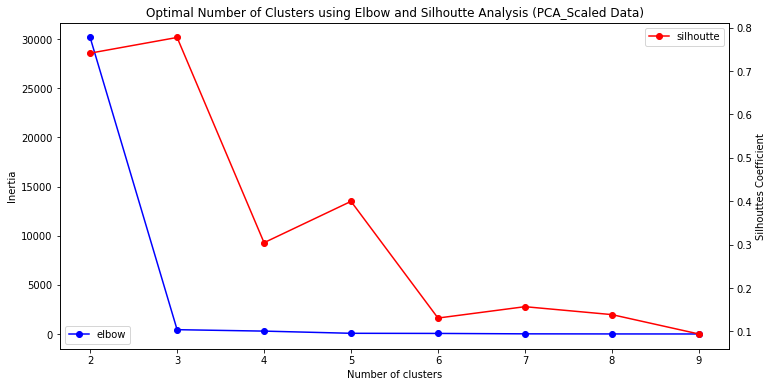

In [32]:
sse = []
silhouttes = []
k_list = range(2, 10)
for k in k_list:
    km = KMeans(n_clusters=k,  n_init=1, max_iter=500, init='k-means++', random_state=42)
    km.fit(pca_df_scale)
    labels = km.labels_
    sse.append([k, km.inertia_])
    print("N cluster : ", k)
    silhoutte = metrics.silhouette_score(pca_df_scale, labels)
    print("Silhouette Coefficient: %0.3f" % silhoutte)
    silhouttes.append([k, silhoutte])
    
pca_results_scale = pd.DataFrame({'Cluster': k_list, 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o', color="blue", label="elbow")
plt.title('Optimal Number of Clusters using Elbow and Silhoutte Analysis (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='lower left')
plt.twinx()
plt.plot(pd.DataFrame(silhouttes)[0], pd.DataFrame(silhouttes)[1], marker='o', color='red', label="silhoutte")
plt.ylabel('Silhouttes Coefficient')
f = plt.legend(loc='upper right')

path = "plot/bot-cluster-analysis.png"
f.figure.savefig(path, bbox_inches='tight')

In [33]:
from sklearn.metrics import pairwise_distances_argmin_min

n_cluster = 3
kmeans_pca_scale = KMeans(n_clusters=n_cluster, n_init=100, max_iter=500, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_

clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.7775285536296755


In [34]:
pca_df_scale

,PC1,PC2
0,-32.804080,-9.168362
1,-32.434199,-12.021091
2,-35.027213,-9.719908
3,-30.762818,-2.309456
4,-30.484760,-12.930385
5,-28.364552,-10.331924
6,-39.051054,-0.308723
7,-32.516841,-10.628160
8,-18.040337,-2.631540
9,199.172704,-65.795510


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


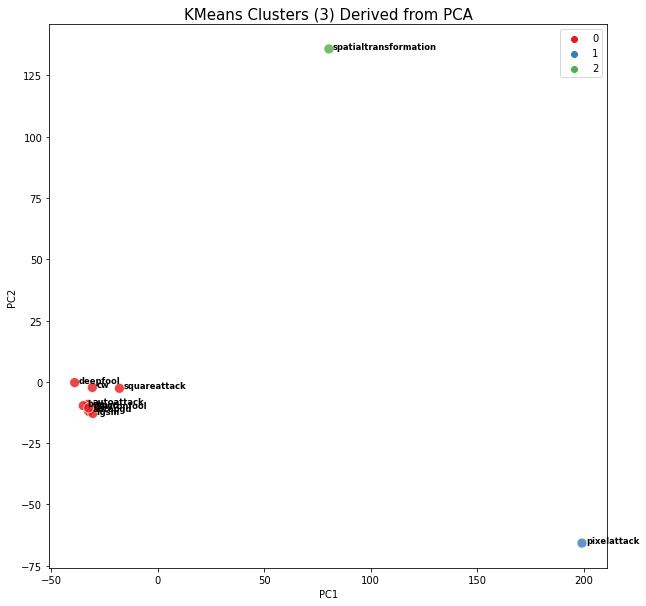

In [35]:
plt.figure(figsize = (10,10))
p1 = sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.8)
p1.set_title('KMeans Clusters ({}) Derived from PCA'.format(n_cluster), fontsize=15)

for line in range(0,pca_df_scale.shape[0]):
     p1.text(pca_df_scale["PC1"][line]+2, pca_df_scale["PC2"][line], 
         attacks[line], horizontalalignment='left', 
         size='small', color='black', weight='semibold')
f = plt.legend()
plt.show()

path = "plot/bot-cluster-result.png"
f.figure.savefig(path, bbox_inches='tight')

In [36]:
sorted_acc

,attack,accuracy
0,autopgd,0.632400
1,deepfool,0.626436
2,autoattack,0.621818
3,cw,0.621636
4,bim,0.620645
5,newtonfool,0.620200
6,pgd,0.615991
7,fgsm,0.611645
8,squareattack,0.582791
9,spatialtransformation,0.449636
